## Loading Data & Visualizations

Goals:
- Get data
- Inspect data
- The .pipe method

#### Loading Data

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed

2 Failed downloads:
['SPY', 'AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [5]:
raw

Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, SPY), (Close, AAPL), (Close, SPY), (High, AAPL), (High, SPY), (Low, AAPL), (Low, SPY), (Open, AAPL), (Open, SPY), (Volume, AAPL), (Volume, SPY)]
Index: []

In [6]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [7]:
# Going to use the .pipe method a lot
raw.pipe?

Signature:
raw.pipe(
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply chainable functions that expect Series or DataFrames.

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
*args : iterable, optional
    Positional arguments passed into ``func``.
**kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.map : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together functions t

In [8]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


**Understanding the fix_cols function**
- This function extracts the first element from each column name and sets it as the new column name.
- It assumes that the column names are tuples or lists (multi-indexed columns).

**Applying .iloc[:, ::2]**
- iloc[:, ::2]: This selects every second column (i.e., 0, 2, 4, ...).
- .pipe(fix_cols): Passes the result of .iloc into the fix_cols function.

**Overall Explanation**
- raw.iloc[:, ::2]: Selects every second column of raw.
- pipe(fix_cols): Passes the subsetted DataFrame to fix_cols, renaming columns by extracting the first element from each column name.

In [9]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

    return (raw
     .iloc[:,::2]
     .pipe(fix_cols)
    )

tweak_data()

[*********************100%***********************]  1 of 2 completed

2 Failed downloads:
['AAPL', 'SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


#### Line Plot

Goals
- Line plots
- Matplotlib plots

In [10]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed

2 Failed downloads:
['AAPL', 'SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [11]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open
Date,,,,,


<Axes: xlabel='Date'>

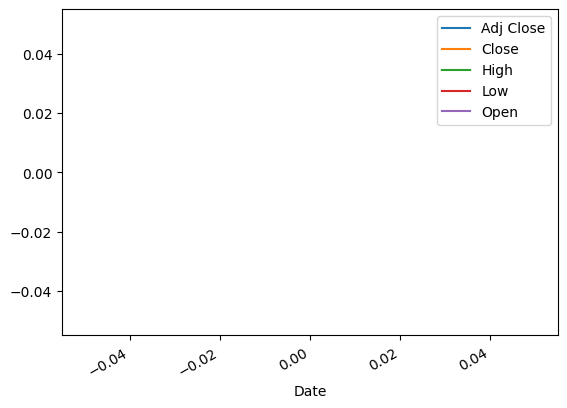

In [12]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
 .plot()
)

<Axes: xlabel='Date'>

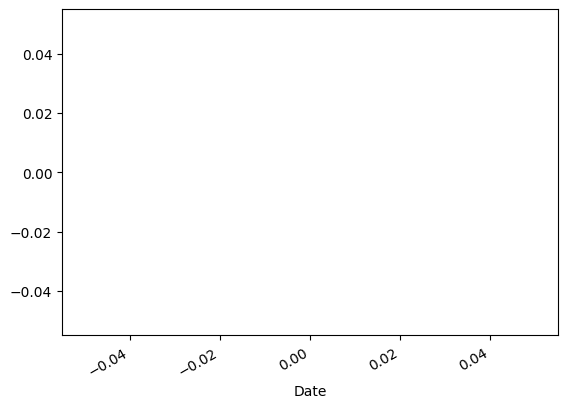

In [13]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<Axes: xlabel='Date'>

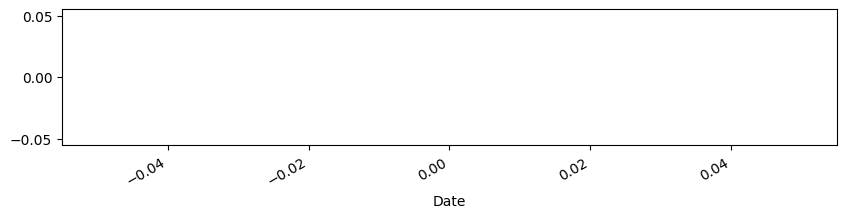

In [14]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10,2))
)

#### Resampling

<Axes: xlabel='Date'>

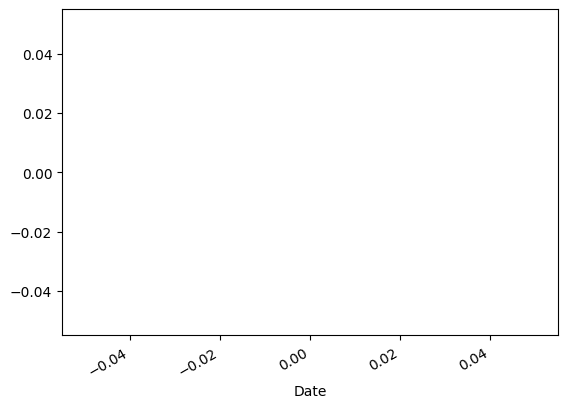

In [15]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [16]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
)

Series([], Name: Close, dtype: float64)

In [17]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\271770984.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


In [18]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\568485902.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


Series([], Freq: ME, Name: Close, dtype: float64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\1015692560.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


ValueError: zero-size array to reduction operation fmin which has no identity

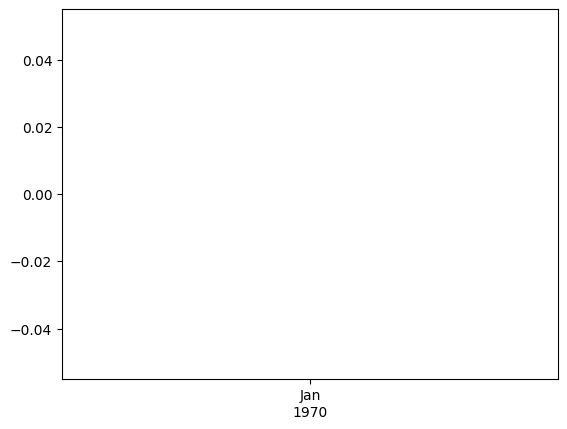

In [19]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
 .plot()
)

#### Candlestick Plot

,Open,High,Low,Close
Date,,,,


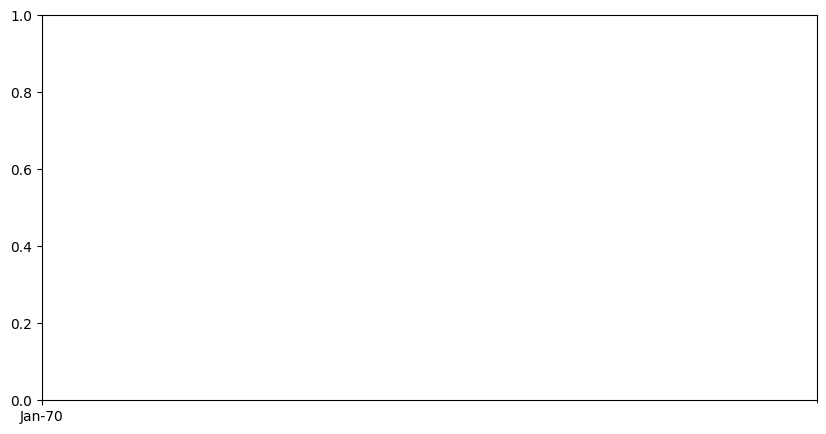

In [20]:
fig, ax=plt.subplots(figsize=(10,5))
def plot_candle(df,ax):
    #wick
    ax.vlines(x=df.index,ymin=df.Low,ymax=df.High,colors="k", linewidth=1)
    #red - decrease
    red=df.query('Open>Close')
    ax.vlines(x=red.index,ymin=red.Close,ymax=red.Open,colors='r',linewidth=3)
    #green - increase
    green=df.query('Open<=Close')
    ax.vlines(x=green.index,ymin=green.Close,ymax=green.Open,colors='g',linewidth=3)

    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y')) #b-month y-year
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('d') #w-week d-day m-month
 .agg({'Open':'first','High':'max','Low':'min','Close':'last'})
 .loc['jan 2018':'jun 2018']
 .pipe(plot_candle,ax)
)

#### Challenge

Plot the Candles for the time period of Sep 2019 to Dec 2019.

,Open,High,Low,Close
Date,,,,


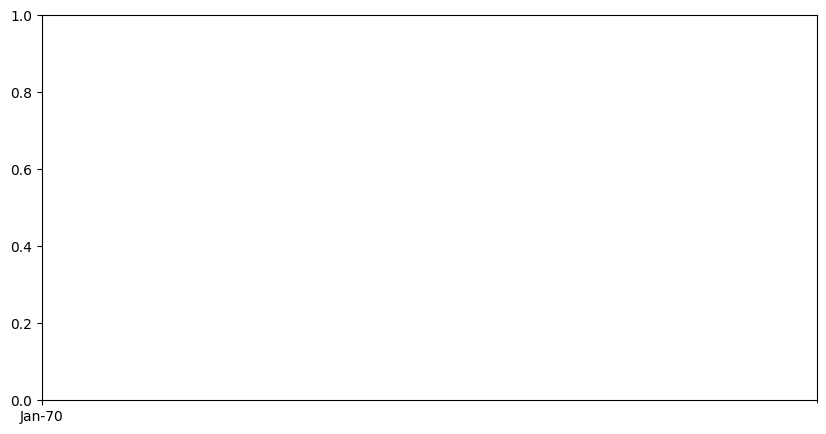

In [21]:
fig, ax=plt.subplots(figsize=(10,5))

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('d') #w-week d-day m-month
 .agg({'Open':'first','High':'max','Low':'min','Close':'last'})
 .loc['sep 2019':'dec 2019'] #.loc['sep 2019':'2019'] will also work since it goes till end of the year
 .pipe(plot_candle,ax)
)

The instructor re-initialized the ax object because the initial plot was not displaying correctly. The issue was that Jupyter Notebook did not create a new ax object when reusing the previous code. By re-initializing ax, the instructor ensured that a new plotting area was created, allowing the candlestick plot to display properly. This step is crucial for troubleshooting and ensuring the plot reflects the correct data range.

## Calculations

Goal
- Explore Pandas methods like .pct_change
- Plotting with Pandas
- Refactoring to functions

#### Returns

In [22]:
aapl=(raw
      .iloc[:,::2]
      .pipe(fix_cols))

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


In [23]:
#Returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


In [24]:
aapl.pct_change?

Signature:
aapl.pct_change(
    periods: 'int' = 1,
    fill_method: 'FillnaOptions | None | lib.NoDefault' = <no_default>,
    limit: 'int | None | lib.NoDefault' = <no_default>,
    freq=None,
    **kwargs,
) -> 'Self'
Docstring:
Fractional change between the current and a prior element.

Computes the fractional change from the immediately previous row by
default. This is useful in comparing the fraction of change in a time
series of elements.

.. note::

    Despite the name of this method, it calculates fractional change
    (also known as per unit change or relative change) and not
    percentage change. If you need the percentage change, multiply
    these values by 100.

Parameters
----------
periods : int, default 1
    Periods to shift for forming percent change.
fill_method : {'backfill', 'bfill', 'pad', 'ffill', None}, default 'pad'
    How to handle NAs **before** computing percent changes.

    .. deprecated:: 2.1
        All options of `fill_method` are deprecated except 

#### Plotting Returns

<Axes: xlabel='Date'>

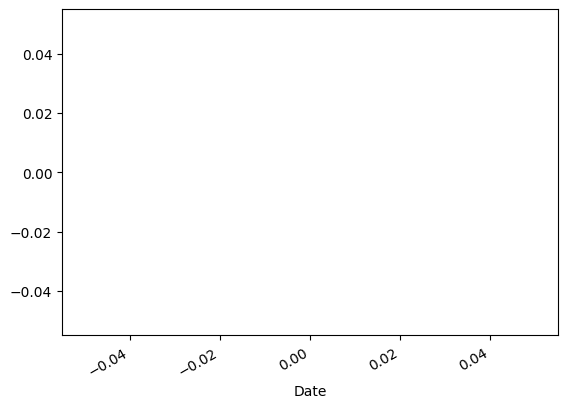

In [25]:
# Plot Returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<Axes: >

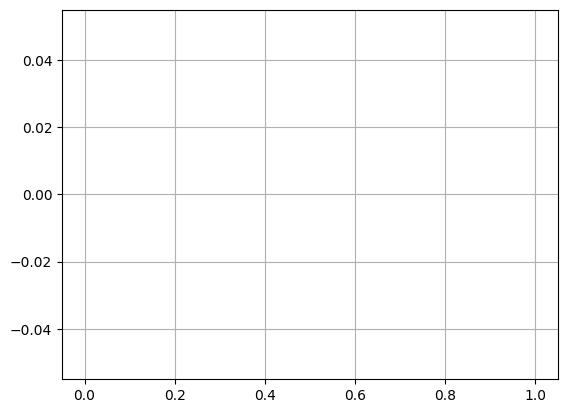

In [26]:
# Histogram of Returns
(aapl
 .pct_change()
 .Close
 .hist()
)

<Axes: >

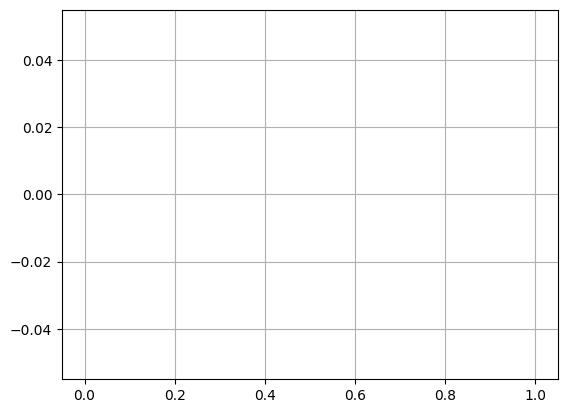

In [27]:
# Change bins
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

IndexError: index 0 is out of bounds for axis 0 with size 0

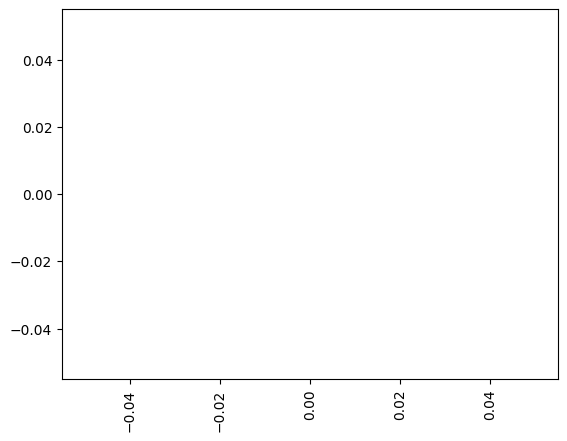

In [28]:
# Understanding plotting in Pandas is a huge lever
# Bar Plot Returns
(aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .plot.bar()
)

IndexError: index 0 is out of bounds for axis 0 with size 0

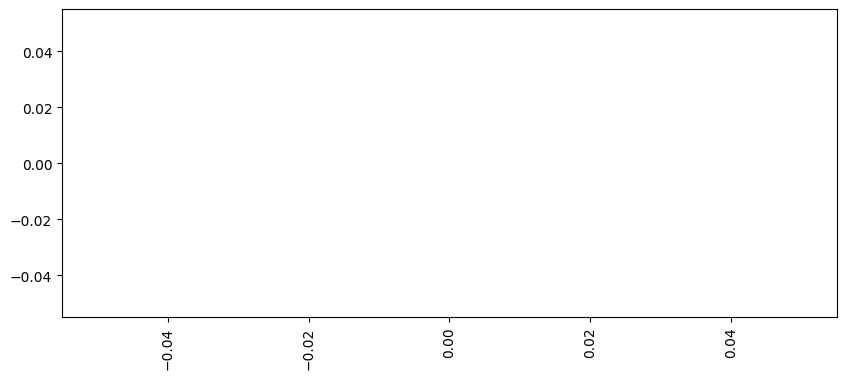

In [29]:
# Bar Plot of Returns
# Sadly dates are broken with pandas bar plots
# 1970s?
fig, ax=plt.subplots(figsize=(10,4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .plot.bar(ax=ax)
)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

In the "Plotting returns" video, the instructor mentions a bug in Pandas related to bar plots. When you create a bar plot in Pandas, it converts the dates in the index to categorical values. This can cause issues with date formatting on the x-axis, making the plot less readable. To address this, the instructor suggests using Matplotlib directly for bar plots, as it handles date formatting correctly.

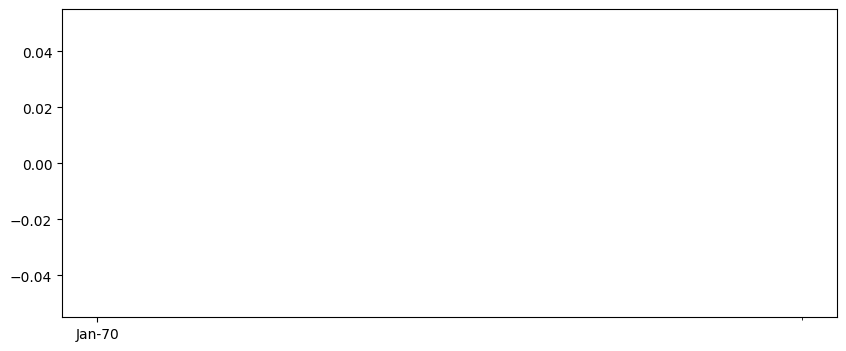

In [30]:
# Returns - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return ser

fig, ax=plt.subplots(figsize=(10,4))
_ = (aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .pipe(my_bar,ax)
)

#### Cumulative Returns

Goal:
- More complicated Pandas
- Refactoring into a function
- Explore source
- Creating new columns with .assign
- Illustrate lambda

Cumulative Returns is the amount that investment has gained or lost over time:
$$\frac{\text{current\_price} - \text{original\_price}}{\text{original\_price}}$$


<Axes: xlabel='Date'>

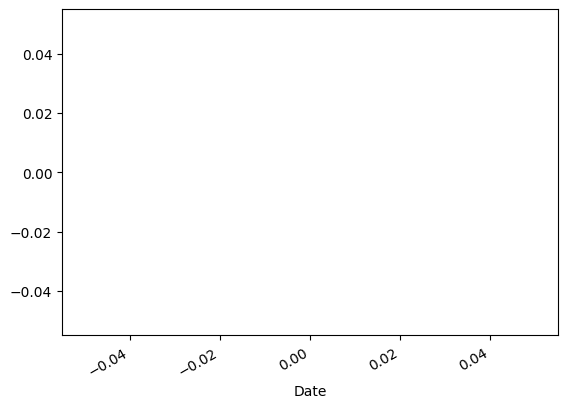

In [31]:
(aapl
 .Close
 .plot()
)

In [32]:
(aapl
 .Close
 .sub(aapl.Close[0])
 .div(aapl.Close[0])
 .plot()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\2621645589.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(aapl.Close[0])


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# alternate calculation
(aapl
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

In [ ]:
aapl.cumprod??

In [ ]:
pd.core.generic.NDFrame.cumprod??

In [ ]:
np.cumprod??

In Jupyter Notebook, using double question marks (??) is a handy way to pull up the source code of a function or method. Here's how it works:

When you type function_name?? and run the cell, Jupyter Notebook will display the source code of that function.
This is useful for understanding how a function works internally, especially if you want to see the implementation details.

For example, if you want to see the source code for the cumprod method in pandas, you would type:
python
pd.Series.cumprod??

This will show you the actual code behind the cumprod method, helping you understand its inner workings.


In [ ]:
# create a function for calculating
def calc_cum_returns(df,col):
    ser=df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(aapl
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [ ]:
def get_returns(df):
    return calc_cum_returns(df,'Close')

get_returns(aapl)

In [ ]:
# Lambda is an "anonymous function"

(lambda df: get_returns(df))(aapl)

In [ ]:
# Create a new column
(aapl
 .assign(cum_returns=lambda df:calc_cum_returns(df,'Close'))
)

In [ ]:
# Returns - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax=plt.subplots(figsize=(10,4))
_=(aapl
   .pipe(calc_cum_returns,'Close')
   .iloc[-100:]
   .pipe(my_bar,ax)
  )

#### Volatility

Goals
- More complicated Pandas
- Learn about rolling operations

In [ ]:
(aapl
 .Close
 .mean()
)

In [ ]:
(aapl
 .Close
 .std() # Standard Deviation
)

In [ ]:
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .pct_change_close
 .std()
)

In [ ]:
(aapl
 .assign(close_vol=aapl.rolling(30).Close.std(),
         per_vol=aapl.Close.pct_change().rolling(30).std())
 .iloc[:, -2:]
 .plot(subplots=True)
)

In [ ]:
# 15 day grouping volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .resample('15D')
 .std()
)

In [ ]:
# 15 day rolling volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .rolling(window=15, min_periods=15)
 .std()
)

- **Window**: This parameter specifies the size of the moving window. For example, if you set window=30, it means the rolling calculation will consider the last 30 data points for each computation.
- **min_periods**: This parameter specifies the minimum number of observations in the window required to have a value. For example, if you set min_periods=1, the rolling calculation will produce a result even if there's only one data point in the window. If not specified, it defaults to the window size.


These parameters help in customizing the rolling calculations to suit your data analysis needs.

In [ ]:
# 15 day volatility
# note if column name conflicts with method need to use
# index access ([])
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .rolling(window=15,min_periods=15)
 .std()
 # .pct_change
 ['pct_change']
 .plot()
)

In the "Volatility" video, the instructor uses df['pct_change'] instead of df.pct_change because pct_change is a built-in method of the pandas DataFrame. Using df.pct_change would call the method instead of accessing the column. To avoid this conflict and correctly access the column, the ['pct_change'] syntax is used. This ensures you're referring to the column and not the method.

#### Challenge

Plot the rolling volatility over 30-day sliding windows for 2015-2019

In [ ]:
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .loc['2015':'2019']
 .rolling(window=30,min_periods=30) # .rolling(30,min_periods=30)
 .std()
 ['pct_change']
 .plot()
)

## Rolling Windows

#### Simple Moving Average

Goals:
- Build intuition for rolling
- Illustrate lamba
- Slicing

In [ ]:
(aapl
 .assign(s1=appl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:.['Close','s1','s2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
        )
)

#### Moving Averages Plotting

In [ ]:
(aapl
 .assign(s1=appl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:.['Close','s1','s2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
        )
 .plot()
)

In [ ]:
(aapl
 .assign(s1=appl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:.['Close','s1','s2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
        )
 [['Close','ma3']]
 .iloc[-200:]
 .plot()
)

In [ ]:
# Golden Cross
(aapl
 .assign(
         ma50=aapl.Close.rolling(50).mean(),
         ma200=aapl.Close.rolling(200).mean(),
        )
 [['Close','ma50','ma200']]
 .iloc[-400:]
 .plot()
)

#### Challenge: Exponential moving average

Create a plot with three lines:
- AAPL close price in 2015
- Exponential moving average with alpha=.0392
- Exponential moving average with alpha=.00995

Hint:
- Use the .ewm method to create a rolling aggregator.

In [33]:
aapl.ewm?  

Signature:
aapl.ewm(
    com: 'float | None' = None,
    span: 'float | None' = None,
    halflife: 'float | TimedeltaConvertibleTypes | None' = None,
    alpha: 'float | None' = None,
    min_periods: 'int | None' = 0,
    adjust: 'bool_t' = True,
    ignore_na: 'bool_t' = False,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    times: 'np.ndarray | DataFrame | Series | None' = None,
    method: "Literal['single', 'table']" = 'single',
) -> 'ExponentialMovingWindow'
Docstring:
Provide exponentially weighted (EW) calculations.

Exactly one of ``com``, ``span``, ``halflife``, or ``alpha`` must be
provided if ``times`` is not provided. If ``times`` is provided,
``halflife`` and one of ``com``, ``span`` or ``alpha`` may be provided.

Parameters
----------
com : float, optional
    Specify decay in terms of center of mass

    :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.

span : float, optional
    Specify decay in terms of span

    :math:`\alpha = 2 / (span + 1)`, for :math

In [35]:
# Golden Cross
(aapl
 .assign(
         ewm_0392=aapl.Close.ewm(alpha=.0392).mean(), # alpha is the smoothing factor
         ewm_00995=aapl.Close.ewm(alpha=.00995).mean(),
        )
 .loc['2015':'2015'], ['Close','ewm_0392','ewm_00995']]
 .plot()
)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 2 (3853214415.py, line 7)

## Technical Analysis

Goals:
- Show if/else in Pandas
- Refactoring to functions

#### On-balance Volume (OBV)
Indicator of momentum using volume

$$
OBV = OBV_{prev} + 
\begin{cases} 
\text{volume}, & \text{if } close > close_{prev} \\
0, & \text{if } close = close_{prev} \\
-\text{volume}, & \text{if } close < close_{prev} 
\end{cases}
$$

$$
\mathbf{where:}
$$

$$
OBV = \text{Current on-balance volume level}
$$

$$
OBV_{prev} = \text{Previous on-balance volume level}
$$

$$
\text{volume} = \text{Latest trading volume amount}
$$

In [ ]:
aapl.Close

In [ ]:
aapl.Close.shift(1)

In [ ]:
# naive

def calc_obv(df):
    df = df.copy()
    df["OBV"] = 0.0

    # loop through the data and calculate OBV
    for i in range(1, len(df)):
        if df["Close"][i] > df["Close"][i - 1]:
            df["OBV" ][i] = df["OBV"][i - 1] + df["Volume"][i]
        elif df["Close"][i] < df["Close"][i - 1]:
            df["OBV"][i] = df["OBV"][i - 1] - df["Volume"][i]
        else:
            df["OBV"][i] = df["OBV"] [i - 1]
    return df

calc_obv(aapl)

In [ ]:
%%timeit
calc_obv(aapl)

In [ ]:
aao., Volume, where?
X%timeit
# This is painfull
(aapl
• assign(close_prev=aapl.Close.shift(1),
vol=0,
obv=lambda adf: adf.vol.where(cond=adf.Close == adf.close_prev,
other=adf. Volume-where(cond=adf.Close › adf.close_prev,
other=-adf.Volume.where(cond=adf.Close < adf.close_prev, other=0)
)) - cumsum()